# Chapter III

## Quantitive comparisions: bar-charts

In this chapter, we will focus on quantitative comparisons between parts of the data

Let's look at a dataset that contains information about the number of medals won by a few countries in the 2016 Olympic Games. The data is not very large.

Let's start by reading the data in from a file. We tell pandas to create a DataFrame from a file that contains the data and to use the first column, which contains the country names, as the index for the DataFrame. 

Next, we can visualize the data about gold medals. We create a Figure and an Axes object and call the Axes bar method to create a bar chart. 

This chart shows a bar for every row in the "Gold" column of the DataFrame, where the height of the bar represents the number in that row. 

The labels of the x-axis ticks correspond to the index of the DataFrame, which contains the names of the different countries in the data table.

To fix these labels, we can rotate them by 90 degrees. This is done by using the **set_xticklabels** method of the Axes. We also take the opportunity to add a label on the y-axis, telling us that the height corresponds to the number of medals. 

C:\Users\devil\AppData\Local\Temp\ipykernel_18072\1068404142.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


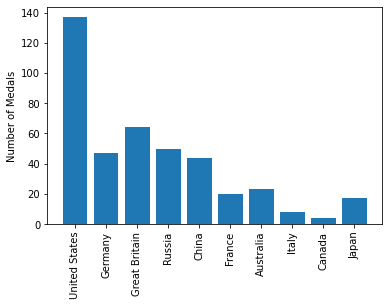

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
# DataFrame (indexing on the country column)
medals = pd.read_csv('datasets\\medals_by_country_2016.csv', index_col=0)
# Subplots
fig, ax = plt.subplots()
# Adding data using .bar method for axes object
ax.bar(medals.index, medals['Gold'])
# Rotating the X axis tick labels
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of Medals")
# Show the plot
plt.show()

Next, we would like to add the data about the other medals: Silver and Bronze. To add this information into the same plot, we'll create a **stacked bar chart**. This means that each new data will be stacked on top of the previous data. 

It starts the same way as before. Next, we add another call to the bar method to add the data from the "Silver" column of the DataFrame. We add the **bottom** key-word argument to tell Matplotlib that the bottom of this column's data should be at the height of the previous column's data. 

We add the x-axis tick labels, rotating them by 90 degrees, set the y-axis labels, and call plt-dot-show.

Similarly, we can add in the number of Bronze medals, setting the bottom of this bar to be the sum of the number of gold medals and the number of silver medals.

To make this figure easier to read and understand, we would also like to label which color corresponds to which medal. To do this we need to add two things.

The first is to add the **label** key-word argument to each call of the bar method with the label for the bars plotted in this call. 

The second is to add a call to the Axes legend method **before calling show**. This adds in a legend that tells us which color stands for which medal.

This is what the figure looks like with the legend.

C:\Users\devil\AppData\Local\Temp\ipykernel_18072\3005859760.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


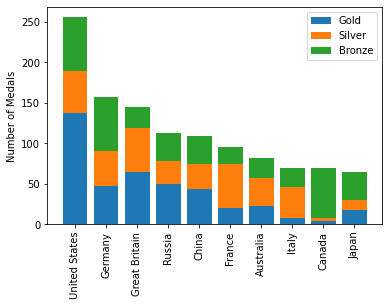

In [32]:
fig, ax = plt.subplots()
# Adding Gold medal data, adding legend
ax.bar(medals.index, medals["Gold"], label="Gold")
# Adding Silver medal data on top of Gold medals and adding legend
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label="Silver")
# Adding Bronze medal data on top of other two medals
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"] + medals["Silver"], label="Bronze")
# Rotating x labels by 90 degrees
ax.set_xticklabels(medals.index, rotation=90)
# Setting y label to number of medals
ax.set_ylabel("Number of Medals")
# Do Not forget to add ax.legend() before the show !!!
ax.legend()
# Show the plot
plt.show()

## Histograms

Bar-charts show us the value of a variable in different conditions. Now, we're going to look at histograms. This visualization is useful because it shows us the entire distribution of values within a variable.

Let's look at another example. In this case, we are looking at data about the athletes who participated in the 2016 Olympic Games. We've extracted two DataFrames from this data: all of the medal winners in men's gymnastics and all of the medal winners in men's rowing. You can see that the data contains different kinds of information: what kinds of medals each competitor won, and also the competitor's height and weight.

In [33]:
summer_2016 = pd.read_csv("datasets/summer2016.csv")

summer_2016.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
1,161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
2,175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
3,450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


For this course we will substract two mini-DataFrames from our main DataFrame summer_2016.

mens_rowing and mens_gymnastics

In [34]:
mens_rowing = summer_2016[summer_2016["Sport"] == "Rowing"]
mens_gymnastics = summer_2016[summer_2016["Sport"] == "Gymnastics"]

Let's start by seeing what a comparison of heights would look like with a bar chart. After creating the Figure and Axes objects, we add to them a bar with the mean of the rowing "Height" column. 

Then, we add a bar with the mean of the gymnastics "Height" column. 

We set the y-axis label and show the figure, which gives us a sense for the difference between the groups.

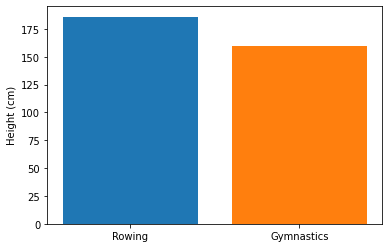

In [35]:
fig, ax = plt.subplots()

ax.bar("Rowing", mens_rowing["Height"].mean())
ax.bar("Gymnastics", mens_gymnastics["Height"].mean())
ax.set_ylabel("Height (cm)")
plt.show()

But a histogram would instead show the full distribution of values within each variable. Let's see that. 

We start again by initializing a Figure and Axes. 

We then call the Axes hist method with the entire "Height" column of the men's rowing DataFrame. We repeat this with the men's gymnastics DataFrame. 

In the histogram shown, the x-axis is the values within the variable and the height of the bars represents the number of observations within a particular bin of values. 

For example, there are 12 gymnasts with heights between 164 and 167 centimeters, so the highest bar in the orange histogram is 12 units high. Similarly, there are 20 rowers with heights between 188 and 192 centimeters, and the highest bar in the blue histogram is 20 units high.

Because the x-axis label no longer provides information about which color represents which variable, labels are really needed in histograms. 

As before, we can label a variable by calling the hist method with the **label** key-word argument and then **calling the legend method before we call plt.show**, so that a legend appears in the figure.

You might be wondering how Matplotlib decides how to divide the data up into the different bars. Per default, the **number of bars or bins in a histogram is 10**, but we can customize that. If we provide an integer number to the **bins** key-word argument, the histogram will have that number of bins.

If we instead provide a sequence of values, these numbers will be set to be the boundaries between the bins, as shown here. There is one last thing to customize.

Instead of the "bar" type that is used per default, you can specify a **histtype of "step"**, which displays the histogram as thin lines, instead of solid bars.

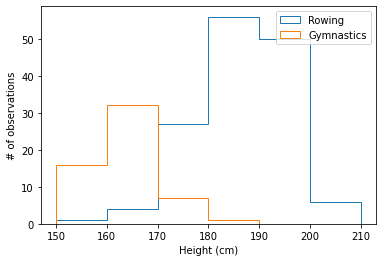

In [36]:
fig, ax = plt.subplots()

ax.hist(mens_rowing["Height"], label="Rowing", 
        bins=[150, 160, 170, 180, 190, 200, 210],
        histtype="step")
ax.hist(mens_gymnastics["Height"], label="Gymnastics", 
        bins=[150, 160, 170, 180, 190, 200, 210],
        histtype="step")

ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

## Statistical Plotting

In the previous lesson, you saw how to create histograms that compare distributions of data. How can we make these comparisons more formal? Statistical plotting is a set of methods for using visualization to make comparisons. Here, we'll look at two of these techniques.

### Adding error bars to bar charts

The first is the use of error bars in plots. These are additional markers on a plot or bar chart that tell us something about the distribution of the data. Histograms, that you have seen in the previous lesson, show the **entire distribution**. Error bars instead summarize the distribution of the data in one number, such as the standard deviation of the values.

To demonstrate this, we'll use the data about heights of medalists in the 2016 Olympic Games. There are at least **two** different ways to display error bars. 

Here, we add the error bar as an argument to a bar chart. Each call to the ax.bar method takes an x argument and a y argument. 

In this case, y is the **mean** of the "Height" column. The **yerr key-word** argument takes an additional number. In this case, the standard deviation of the "Height" column, and displays that as an additional vertical marker.

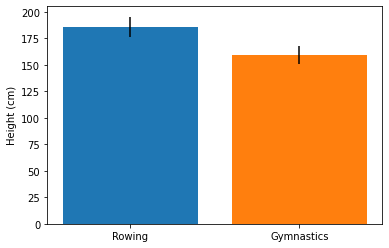

In [37]:
fig, ax = plt.subplots()

ax.bar("Rowing", 
       mens_rowing["Height"].mean(),
       yerr=mens_rowing["Height"].std())

ax.bar("Gymnastics",
       mens_gymnastics["Height"].mean(),
       yerr=mens_gymnastics["Height"].std())

ax.set_ylabel("Height (cm)")

plt.show()

We can also add error bars to a line plot. Similar to before, this adds vertical markers to the plot, which look like this.

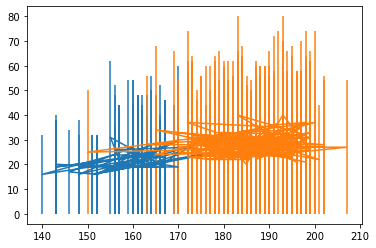

In [38]:
fig, ax = plt.subplots()   

ax.errorbar(mens_gymnastics["Height"],
            mens_gymnastics["Age"],
            yerr=mens_gymnastics["Age"])

ax.errorbar(mens_rowing["Height"],
            mens_rowing["Age"],
            yerr=mens_rowing["Age"])

plt.show()

The second statistical visualization technique we will look at is the **boxplot**, a visualization technique invented by **John Tukey**, arguably the first data scientist. 

It is implemented as a **method of the Axes object**. We can call it with a sequence of sequences. In this case, we create a list with the **men's rowing "Height"** column and the **men's gymnastics "Height"** column and pass that list to the method. 

Because the box-plot doesn't know the labels on each of the variables, we add that separately, labeling the y-axis as well. Finally, we show the figure, which looks like this:

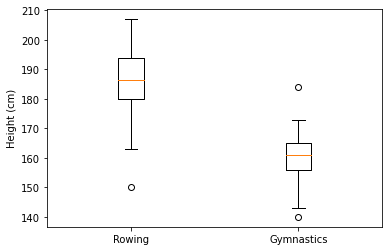

In [39]:
fig, ax = plt.subplots()

ax.boxplot([mens_rowing["Height"],
            mens_gymnastics["Height"]])

ax.set_xticklabels(["Rowing", "Gymnastics"])

ax.set_ylabel("Height (cm)")

plt.show()

This kind of plot shows us several landmarks in each distribution. The **red line** indicates the median height. 

The **edges of the box portion** at the center indicate the inter-quartile range of the data, between the 25th and the 75th percentiles. 

The **whiskers at the ends of the thin bars** indicate one and a half times the size of the inter-quartile range beyond the 75th and 25th percentiles. 

This should encompass **roughly 99 percent of the distribution** if the data is Gaussian or normal. 

Points that appear beyond the whiskers are **outliers**. That means that they have values larger or smaller than what you would expect for 99 percent of the data in a Gaussian or normal distribution. For example, there are three unusually short rowers in this sample, and one unusually high gymnast.

## Scatter Plots

Bar charts show us the values of one variable across different conditions, such as different countries. But what if you want to compare the values of different variables across observations? This is sometimes called a bi-variate comparison, because it involves the values of two different variables.

A standard visualization for bi-variate comparisons is a **scatter plot**. Let's look at an example. 

We'll use the climate change data that we have used previously. Recall that this dataset has a column with measurements of carbon dioxide and a column with concurrent measurements of the relative temperature. 

Because these measurements are paired up in this way, we can represent each measurement as a point, with the distance along the x-axis representing the measurement in one column and the height on the y-axis representing the measurement in the other column. 

To create this plot, we initialize a Figure and Axes objects and call the Axes scatter method. 

The first argument to this method will correspond to the distance along the x-axis and the second argument will correspond to the height along the y-axis. 

We also set the x-axis and y-axis labels, so that we can tell how to interpret the plot and call plt-dot-show to display the figure.

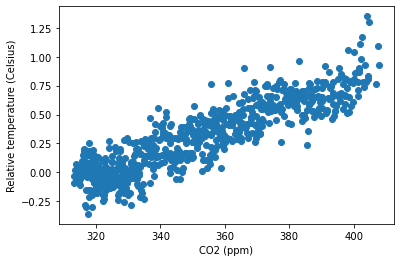

In [40]:
# Getting our DataFrame
climate_change = pd.read_csv('datasets/climate_change.csv', index_col='date', parse_dates=True)

fig, ax = plt.subplots()

ax.scatter(climate_change["co2"], climate_change["relative_temp"])

ax.set_xlabel("CO2 (ppm)")

ax.set_ylabel("Relative temperature (Celsius)")

plt.show()

### Customizing scatter plots
We can customize scatter plots in a manner that is similar to the customization that we introduced in other plots. 

For example, if we want to show two bivariate comparisons side-by-side, we want to make sure that they are visually distinct. Here, we are going to plot two scatter plots on the same axes. In one, we'll show the data from the **nineteen-eighties** and in the other, we'll show the data from the **nineteen-nineties**. 

We can select these parts of the data using the time-series indexing that you've seen before to create two DataFrames called eighties and nineties. 

Then, we add each one of these DataFrames into the Axes object. 

First, we add the data from the eighties. We add customization: we set the color of the points to be red and we label these data with the string "eighties". 

Then, we add the data from the nineties. These points will be blue and we label them with the string "nineties". 

We call the legend method to add a legend that will tell us which DataFrame is identified with which color, we add the axis labels and call plt-dot-show.

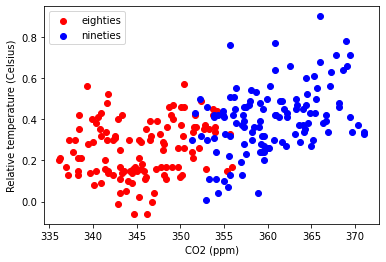

In [41]:
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()

ax.scatter(eighties["co2"], eighties["relative_temp"],
           color="red", label="eighties")

ax.scatter(nineties["co2"], nineties["relative_temp"],
           color="blue", label="nineties")

ax.legend()

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()

This is what this figure looks like. You can see that the relationship between temperatures and carbon dioxide didn't change much during these years, but both levels of carbon dioxide and temperatures continued to rise in the nineties. Color can be used for a comparison, as we did here.

### Encoding a third variable by color

But we can also use the color of the points to encode a third variable, providing additional information about the comparison. 

In the climate change data, we have a continuous variable denoting time stored in the DataFrame index. If we enter the index as input to the **c key-word argument**, this variable will get encoded as color. Note that this is not the color key-word argument that we used before, but is instead just the letter c. 

As before, we set the axis labels and call plt-dot-show.

Now, time of the measurements is encoded in the brightness of the color applied to the points, with dark blue points early on and later points in bright yellow.

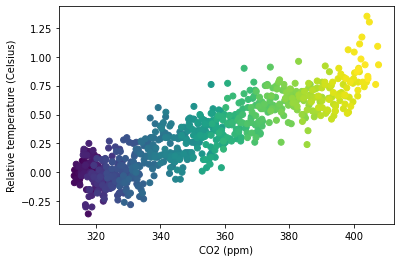

In [42]:
fig, ax = plt.subplots()

ax.scatter(climate_change["co2"], climate_change["relative_temp"],
           c=climate_change.index)

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

plt.show()